In [627]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [101]:
# Once the code is finished, it will be added to a2eipy (python library). 
# Hence, this block will eventually be thrown out from this Jupyter Notebook.

%load_ext autoreload
%run cooking_session.py
%run plot_resources.py
%run on_grid_resources.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 1000x500 with 0 Axes>

In [5]:
# Packages
from pylab import rcParams
import pandas as pd

In [9]:
# Source files
df_raw = pd.read_csv('dataframe_raw_jan14.csv', sep=',' , index_col=False) # SM data Off-grid pilot

In [15]:
# Overview of parameters that are possible to adjust
default_params = {'time_resolution': 5,
         't_between': 15,
         'energy_error_margin': 0.04,
         'mininum_size_of_spikes': 1,
         'minimum_energy_per_cooking_event': 0.05,
         'minimum_power_mean': 0.05,
         'event_min_current': 0.5,
         'maximum_cooking_time':300,
         'time_resolution': 5,
         'minimum_active_load': 0.15,
         'power_capacity': 1}

params = {'time_resolution': 5,
         't_between': 15,
         'energy_error_margin': 0.04,
         'mininum_size_of_spikes': 1,
         'minimum_energy_per_cooking_event': 0.05,
         'minimum_power_mean': 0.05,
         'event_min_current': 0.5,
         'maximum_cooking_time':300,
         'time_resolution': 5,
         'minimum_active_load': 0.15,
         'power_capacity': 1}


# Outputs
df_epc = preprocess_epc_data(df_raw)
df_only_events = create_only_event_df(df_epc)
df_only_events.reset_index(inplace=True)
df_epc = clean_data_set(df_epc)

,timestamp,timezone_region,timestamp_UTC,energy,voltage,current,power,power_factor,frequency,energy_rank,cooking_time,seq_time,event_max_current,event_count,event_energy
meter_number,,,,,,,,,,,,,,,
546281,2020-03-10 21:50:00+03:00,Africa/Dar_es_Salaam,2020-03-10 18:50:00,0.00,229.90,0.0000,0.000000,1.0000,50.00,23.0,10.0,0.0,4.309000,1.0,0.14
546281,2020-03-10 21:55:00+03:00,Africa/Dar_es_Salaam,2020-03-10 18:55:00,0.07,228.20,4.3010,0.981488,0.9990,50.01,23.0,10.0,5.0,4.309000,1.0,0.14
546281,2020-03-10 22:00:00+03:00,Africa/Dar_es_Salaam,2020-03-10 19:00:00,0.14,227.80,4.3090,0.981590,0.9980,50.01,23.0,10.0,10.0,4.309000,1.0,0.14
546281,2020-03-10 23:05:00+03:00,Africa/Dar_es_Salaam,2020-03-10 20:05:00,0.21,229.90,0.0000,0.000000,1.0000,50.01,23.0,NaN,NaN,NaN,NaN,0.00
546281,2020-03-11 08:50:00+03:00,Africa/Dar_es_Salaam,2020-03-11 05:50:00,0.26,228.85,2.1535,0.492828,0.9995,51.02,23.0,69.2,0.0,4.328333,2.0,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546380,2020-11-19 08:30:00+03:00,Africa/Dar_es_Salaam,2020-11-19 05:30:00,5.00,229.90,0.0280,0.006437,0.8280,50.01,73.0,NaN,NaN,NaN,NaN,0.00
546380,2020-11-19 08:35:00+03:00,Africa/Dar_es_Salaam,2020-11-19 05:35:00,5.00,221.10,0.0280,0.006191,0.8260,50.01,73.0,NaN,NaN,NaN,NaN,0.00
546380,2020-11-19 08:40:00+03:00,Africa/Dar_es_Salaam,2020-11-19 05:40:00,5.00,220.10,0.0310,0.006823,0.8380,50.01,73.0,NaN,NaN,NaN,NaN,0.00


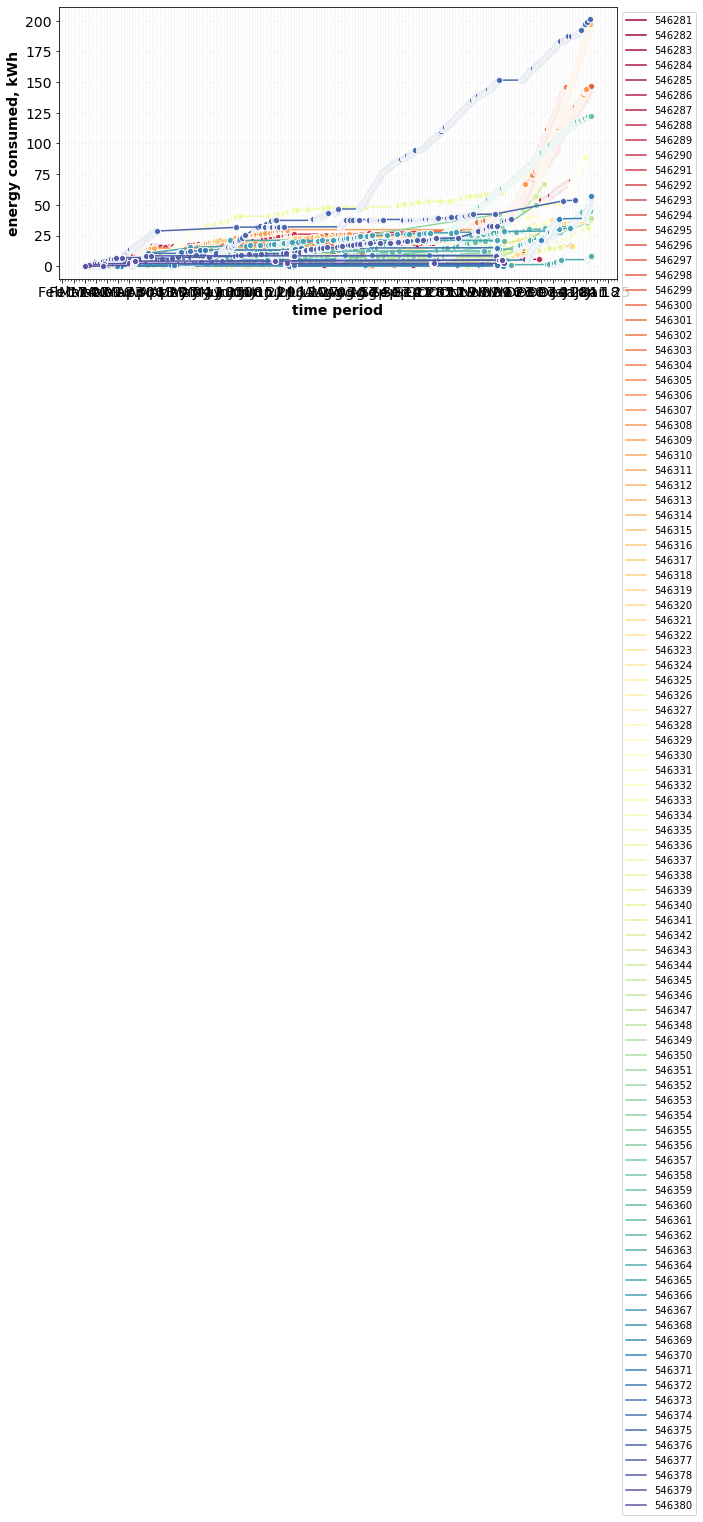

In [16]:
%matplotlib inline
do_plot(df_epc)

In [17]:
df_only_events.describe()

,meter_number,energy,event_energy,power,cooking_time,current,no_recordings,id,power_mean,cooking_cost,event_count
count,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000
mean,546330.903626,32.479807,0.278499,0.588122,29.051672,4.040429,6.740386,262.174541,0.626018,27.849893,3186.000000
std,30.218474,39.032491,0.230026,0.255049,22.032079,0.833935,4.176607,28.504515,0.233700,23.002553,1839.293614
min,546281.000000,0.120000,0.050000,0.000000,3.000000,0.000000,2.000000,214.000000,0.075000,5.000000,1.000000
25%,546302.000000,6.526667,0.140000,0.411074,15.000000,4.147000,4.000000,235.000000,0.440000,14.000000,1593.500000
50%,546332.000000,17.380000,0.220000,0.615034,25.000000,4.206000,6.000000,263.000000,0.640000,22.000000,3186.000000
75%,546360.000000,40.080000,0.350000,0.776180,36.800000,4.280000,8.000000,287.000000,0.818182,35.000000,4778.500000
max,546380.000000,199.170000,2.450000,1.115920,220.000000,4.770000,45.000000,313.000000,1.860000,245.000000,6371.000000


In [18]:
print('No. of cooking events: '+str(df_only_events.event_count.nunique()))

No. of cooking events: 6371


In [19]:
df_epc

,timestamp,timezone_region,timestamp_UTC,energy,voltage,current,power,power_factor,frequency,energy_rank,cooking_time,seq_time,event_max_current,event_count,event_energy
meter_number,,,,,,,,,,,,,,,
546281,2020-03-10 21:50:00+03:00,Africa/Dar_es_Salaam,2020-03-10 18:50:00,0.00,229.90,0.0000,0.000000,1.0000,50.00,23.0,10.0,0.0,4.309000,1.0,0.14
546281,2020-03-10 21:55:00+03:00,Africa/Dar_es_Salaam,2020-03-10 18:55:00,0.07,228.20,4.3010,0.981488,0.9990,50.01,23.0,10.0,5.0,4.309000,1.0,0.14
546281,2020-03-10 22:00:00+03:00,Africa/Dar_es_Salaam,2020-03-10 19:00:00,0.14,227.80,4.3090,0.981590,0.9980,50.01,23.0,10.0,10.0,4.309000,1.0,0.14
546281,2020-03-10 23:05:00+03:00,Africa/Dar_es_Salaam,2020-03-10 20:05:00,0.21,229.90,0.0000,0.000000,1.0000,50.01,23.0,NaN,NaN,NaN,NaN,0.00
546281,2020-03-11 08:50:00+03:00,Africa/Dar_es_Salaam,2020-03-11 05:50:00,0.26,228.85,2.1535,0.492828,0.9995,51.02,23.0,69.2,0.0,4.328333,2.0,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546380,2020-11-19 08:30:00+03:00,Africa/Dar_es_Salaam,2020-11-19 05:30:00,5.00,229.90,0.0280,0.006437,0.8280,50.01,73.0,NaN,NaN,NaN,NaN,0.00
546380,2020-11-19 08:35:00+03:00,Africa/Dar_es_Salaam,2020-11-19 05:35:00,5.00,221.10,0.0280,0.006191,0.8260,50.01,73.0,NaN,NaN,NaN,NaN,0.00
546380,2020-11-19 08:40:00+03:00,Africa/Dar_es_Salaam,2020-11-19 05:40:00,5.00,220.10,0.0310,0.006823,0.8380,50.01,73.0,NaN,NaN,NaN,NaN,0.00


In [20]:
df_epc.reset_index(inplace=True)

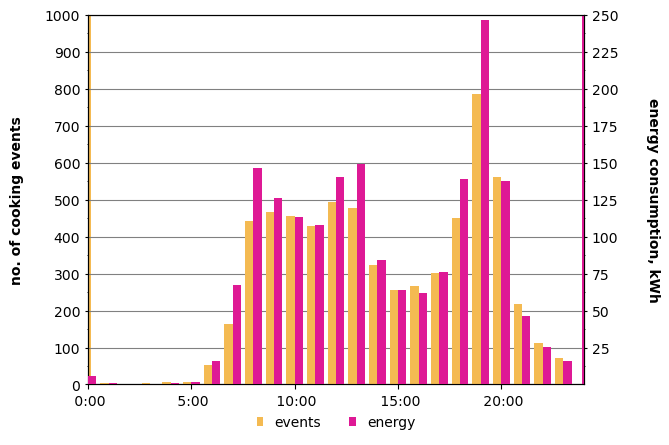

In [31]:
day_plot(df_only_events, 10)

In [657]:
# Simple day plot: 
# df_only_events.groupby([(df_only_events.timestamp.dt.hour)]).agg({'event_energy':'sum'}).event_energy.plot()
# plt.show()

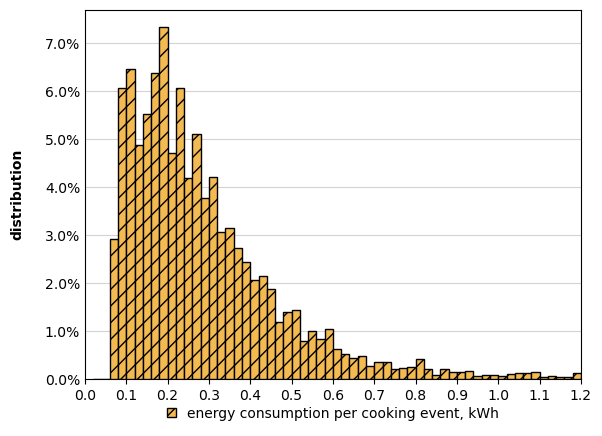

In [32]:
distr_plot(df_only_events)

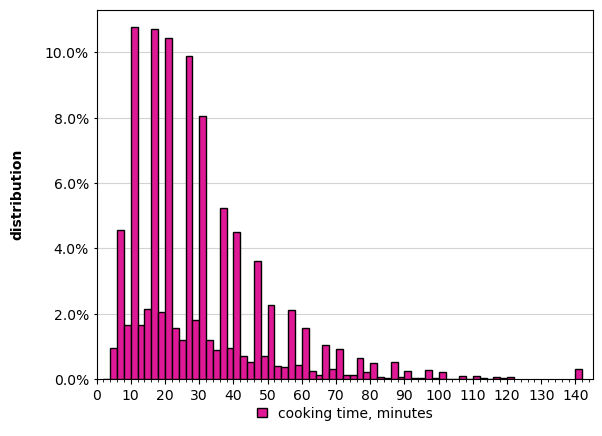

In [33]:
distr_plot_time(df_only_events)

In [58]:
df_only_events.reset_index(inplace=True)

In [57]:
df_only_events

,meter_number,energy,event_energy,power,cooking_time,current,no_recordings,id,power_mean,cooking_cost,event_count
timestamp,,,,,,,,,,,
2020-03-10 21:50:00+03:00,546281,0.14,0.14,0.654359,10.0,4.309000,3,311,0.840000,14.0,1
2020-03-11 08:50:00+03:00,546281,0.55,0.29,0.373258,69.2,4.328333,13,311,0.251445,29.0,2
2020-03-11 19:40:00+03:00,546281,0.69,0.14,0.324014,23.0,4.269000,6,311,0.365217,14.0,3
2020-03-12 09:05:00+03:00,546281,0.96,0.27,0.876780,18.6,4.301000,5,311,0.870968,27.0,4
2020-03-12 19:50:00+03:00,546281,1.15,0.19,0.980994,13.6,4.320000,4,311,0.838235,19.0,5
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01 15:50:00+03:00,546380,2.22,0.58,0.709354,50.0,4.328000,11,219,0.696000,58.0,6367
2020-04-01 16:50:00+03:00,546380,2.33,0.11,0.138790,30.0,4.295000,7,219,0.220000,11.0,6368
2020-04-01 17:25:00+03:00,546380,3.39,1.06,0.370515,100.0,4.310000,21,219,0.636000,106.0,6369


In [73]:
# Change the Width and Height of the following graph
plt.rcParams['figure.figsize'] = [14, 5]

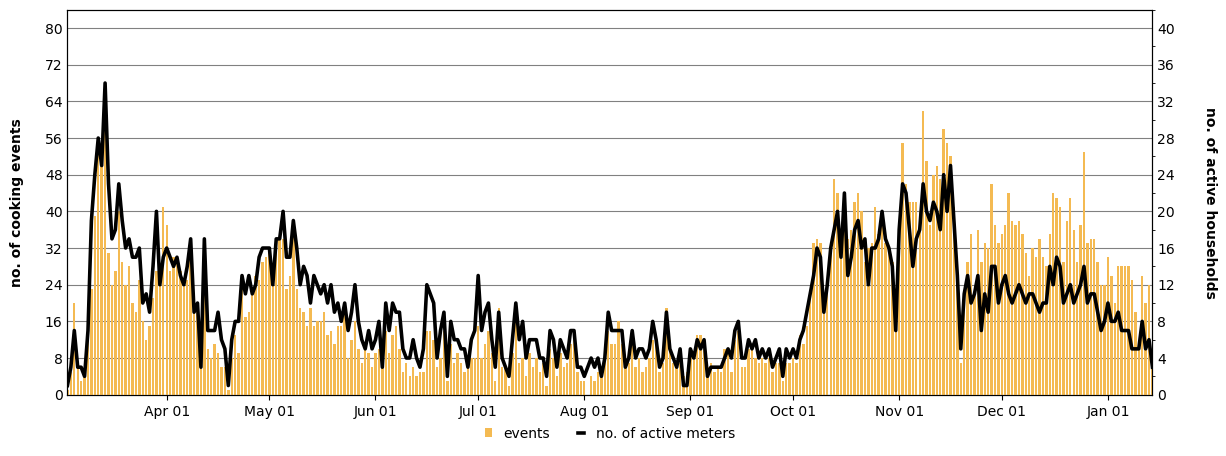

In [67]:
df_day = df_only_events.groupby(df_only_events.timestamp.dt.date).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
classic_graph(df_day, 4)

In [83]:
# Change the Width and Height of the following graph
plt.rcParams['figure.figsize'] = [20, 5]

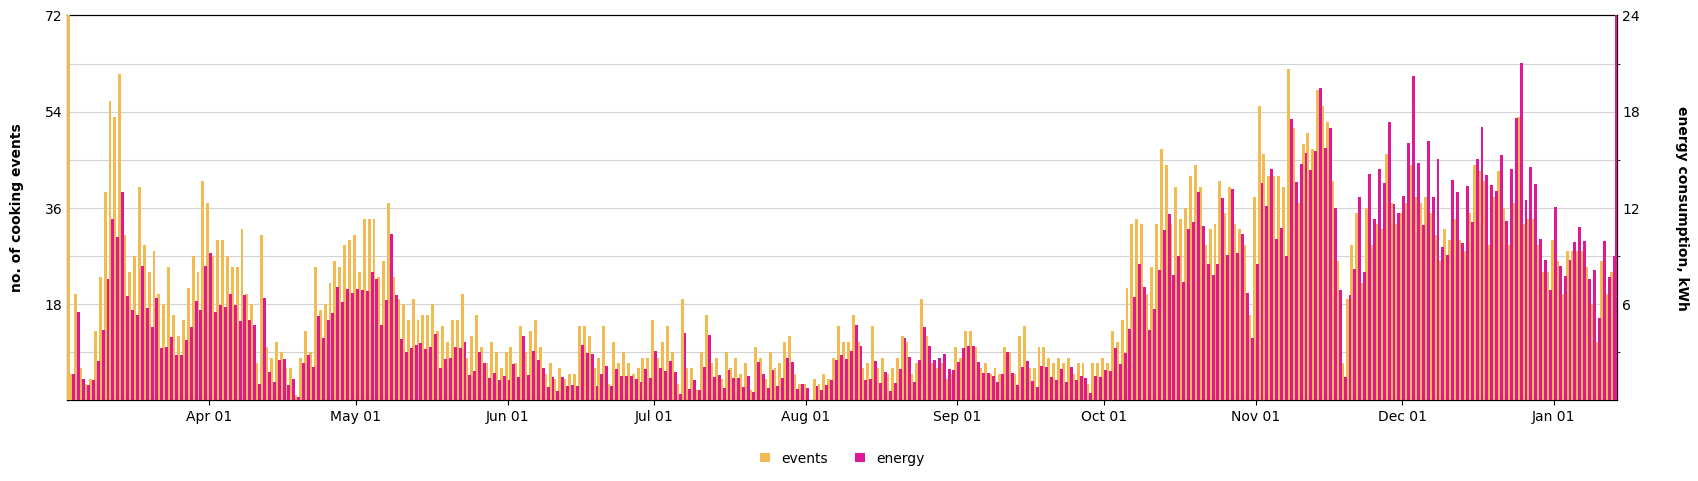

In [84]:
df_day = df_only_events.groupby(df_only_events.timestamp.dt.date).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
energy_and_time_plot(df_day, 3)

In [ ]:
# Simple plots of week and month
'''
df_only_events.groupby((df_only_events.timestamp.dt.isocalendar().week)).agg({'event_energy':'sum'}).event_energy.plot()
plt.title('Energy per week')
plt.show()

df_only_events.groupby(([df_only_events.timestamp.dt.month])).agg({'event_energy':'sum'}).event_energy.plot(marker='o')
plt.title('Energy per month')
plt.show()
'''

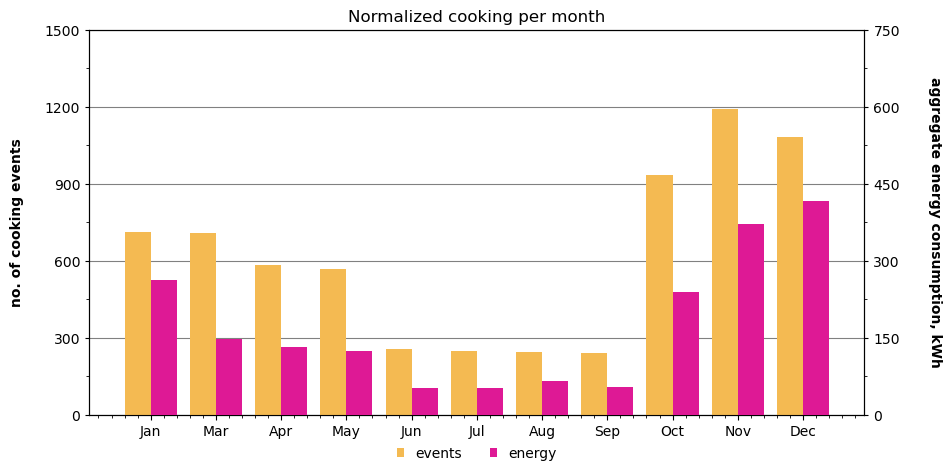

In [86]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

df_month = df_only_events.groupby(df_only_events.timestamp.dt.month).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
norm_month_time = {1:14/31,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1}

month_plot(df_month, norm_month_time, 3)

## Quantiles

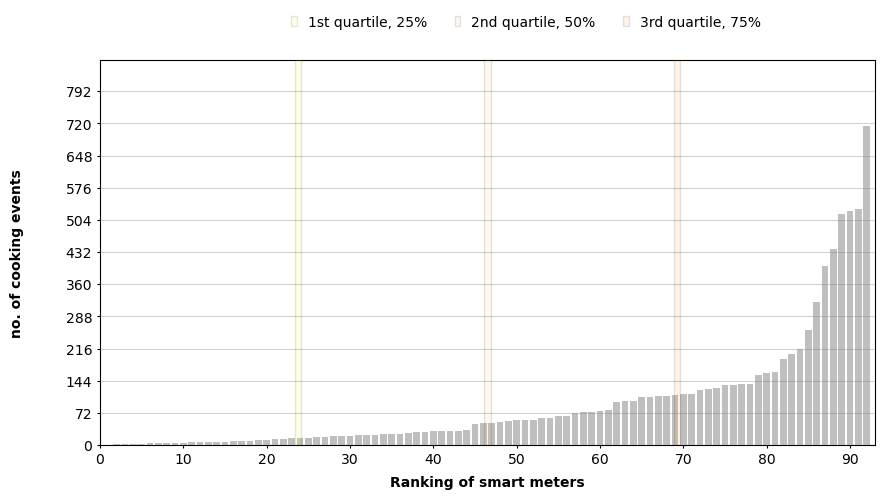

In [102]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

quantiles_plot(df_only_events, event_basis='yes', yaxis_adjustment=4)

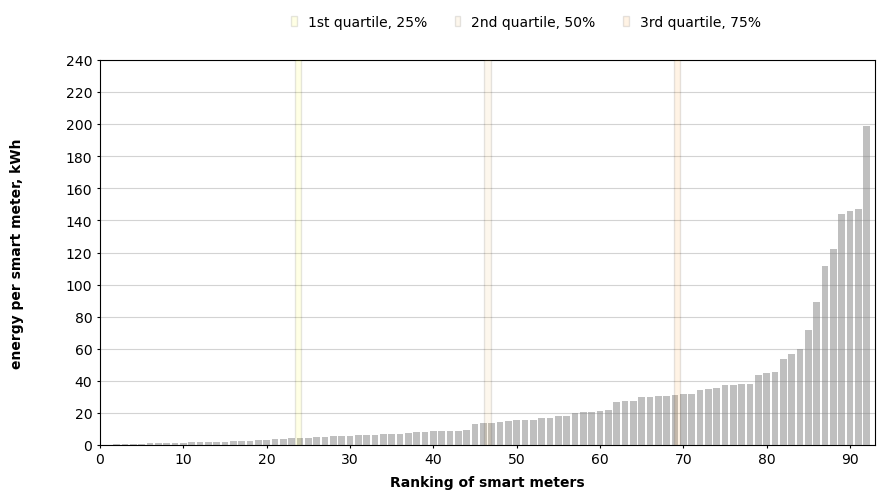

In [103]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

quantiles_plot(df_only_events, yaxis_adjustment=4)